# Classification with Logistic regression and SVM 

**What you will learn today**: You will learn how to implement a classifier. First we will analyze a toy example in which we will use a logistic classifier coded from scratch. Once we understood the logic behind the algorithm we will use the black box Sklearn one for recognizing hand-written digits. You will also implement SVM classifier on a different dataset to get familiar with this important family of algorithm.

# 1) Logistic regression from scratch

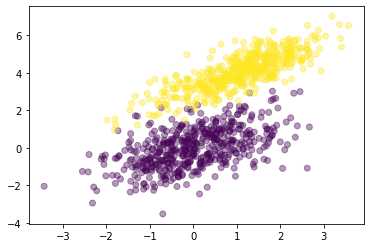

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0], [[1, .5],[.5, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .8],[.8, 1]], num_observations)

dataset = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),np.ones(num_observations)))

plt.figure(figsize=(6,4))
plt.scatter(dataset[:, 0], dataset[:, 1],c = labels, alpha = .4)

Our goal is to use a logistic-type modeling here. In this case:
$$P_{\rm model}(l({\bf x})=1) = \frac 1{1+\exp(-{\bf \theta} \cdot {\bf x})}~~~ \text{and}~~~ P_{\rm model}(l({\bf x})=0) = \frac {\exp(-{\bf w} \cdot {\bf x})}{1+\exp(-{\bf w} \cdot {\bf x})}$$


Now, we use the cross-entropy loss, and we write:
$$\mathcal{L}(\bf{w}) = - \sum_{\rm dataset} \sum_{l=0,1} P_{\rm true}(x=l) \log(P_{\rm model}(x=l)) $$
This yields the simpler expression:
$$\mathcal{L}(\bf {w}) =  \sum_{\rm dataset} - y_i {\bf {w}} \cdot {\bf x}_i  + \log{(1+\exp({\bf w} \cdot {\bf x}_i ))} $$

Let us implement these function:

In [2]:

def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))
def log_loss(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return -ll

In order to perform optimization, we need to compute the gradient and perform gradient ascent. Here we have:

$$\nabla_{\theta} \mathcal{L}(\theta) =  \sum_{i \in \rm dataset} - y_i  {\bf x}_i  + {\bf x}_i  \frac{\exp({\bf \theta} \cdot {\bf x}_i )}{(1+\exp({\bf \theta} \cdot {\bf x}_i ))} = - \sum_{i \in \rm dataset} {\bf x}_i^T (y_i - P(l({\bf x_i})=1)) $$

We can now write the  logistic regression

In [3]:
def logistic_regression(features, target, num_steps, learning_rate):

    weights = np.zeros(features.shape[1])##Initialization from 0
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood from time to time
        if step % 10000 == 0:
            print (step," ",log_loss(features, target, weights))
        
    return weights

Remember theoretical lectures? 

We use the usual trick of adding a "1" to the data so that we can actually linear fitting, and call the regression function

In [4]:
intercept = np.ones((dataset.shape[0], 1))
data_with_intercept = np.hstack((intercept, dataset))

weights = logistic_regression(data_with_intercept, labels, num_steps = 300000, learning_rate = 5e-5)

0   641.4915413318754
10000   40.79047954980942
20000   35.586186702115704
30000   33.66502648744614
40000   32.68147150954615
50000   32.09768506598482
60000   31.720291575347915
70000   31.462336197562244
80000   31.278962625197877
90000   31.144761212063923
100000   31.04432507177191
110000   30.96781706465474
120000   30.90869650933311
130000   30.862470507127917
140000   30.82596928449061
150000   30.796906261881087
160000   30.773600746306627
170000   30.75479747989522
180000   30.739545968191962
190000   30.727117855805375
200000   30.716949174067377
210000   30.70859923423312
220000   30.701720894578425
230000   30.696038744420566
240000   30.691332890865155
250000   30.687426770101304
260000   30.68417788882525
270000   30.681470725216595
280000   30.6792112393407
290000   30.677322595228414


Now we can plot the prediction from our model, and check how good they are on the training dataset

In [5]:
def line(x,a,b,c):
    return -x*b/c-a/c
def myline(x):
    return line(x,weights[0],weights[1],weights[2])

final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy: {0}'.format((preds == labels).sum().astype(float) / len(preds)))

Accuracy: 0.988


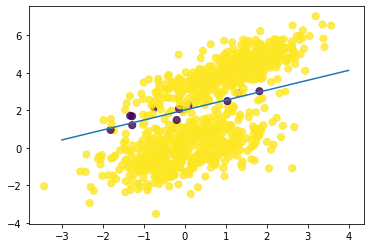

In [6]:
plt.figure(figsize = (6, 4))
plt.scatter(dataset[:, 0], dataset[:, 1],
            c = (preds == labels) , alpha = .8, s = 50)
plt.plot([-3,4],[myline(-3),myline(4)])

In high dimensional statistcs problems, it is often the case that the number of points are of the same order as the dimension. Let us mimick this by using fewer points in dimension 2!

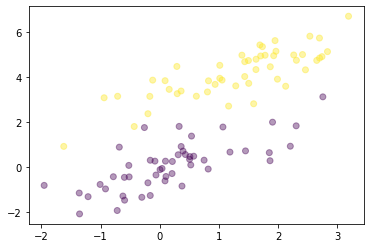

In [7]:
np.random.seed(12)
num_observations = 50

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

dataset = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
plt.figure(figsize=(6,4))
plt.scatter(dataset[:, 0], dataset[:, 1], c = labels, alpha = .4)

Of course, we could just redo our fit

In [8]:
intercept = np.ones((dataset.shape[0], 1))
data_with_intercept = np.hstack((intercept, dataset))

weights = logistic_regression(data_with_intercept, labels,num_steps = 100000, learning_rate = 1e-1)

0   303.5518681887195
10000   2.3821586260355
20000   2.3761466259841533
30000   2.3756893661885297
40000   2.375644595397427
50000   2.375639898416093
60000   2.3756393949278354
70000   2.375639340579934
80000   2.375639334700089
90000   2.375639334063491


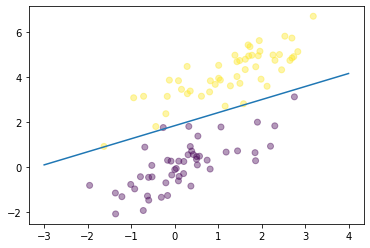

In [9]:
def myline(x):
    return line(x,weights[0],weights[1],weights[2])

plt.figure(figsize=(6,4))
plt.scatter(dataset[:, 0], dataset[:, 1], c = labels, alpha = .4)
plt.plot([-3,4],[myline(-3),myline(4)])

**BONUS** Generate data such that they can be linearly seprated. In this case, it is interesting to stop the fitting a bit early, then we see that as we continue to fit, the separatrix moves "away" from the point, and actually help putting a margin, thus helpling the generalization. This is one of the appeal of the cross-entropy loss.

# Linearly separable synthetic dataset

.....work in progress.....

# 2) Logistic regression on real dataset 



Let us use the fantastic notebooks from https://physics.bu.edu/~pankajm/MLnotebooks.html, a terrific book for ML newcomers especcially if they come from physics. We will consider again our friend MNIST, remember the lecture on KNN? First a bit of history on this famous dataset:


The MNIST classification problem is one of the classical ML problems for learning classification on high-dimensional data with a fairly sizable number of examples (60000). Yann LeCun and collaborators collected and processed $70000$ handwritten digits (60000 are used for training and 10000 for testing) to produce what became known as one of the most widely used datasets in ML: the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Each handwritten digit comes in a grayscale square image in the shape of a $28\times 28$ pixel grid. Every pixel takes a value in the range $[0,255]$, representing $256$ nuances of the gray color. The problem of image classification finds applications in a wide range of fields and is important for numerous industry applications of ML}

 ### SoftMax regression:
 Before we consider two possible labels for our data, you can easily guess that it is amenable to have more than one in this case. 

 Do not worry! We can easily generalize what we said before. 


We will use SoftMax regression, which can be thought of as a statistical model which assigns a probability that a given input image corresponds to any of the 10 handwritten digits. The model is a generalization of the logistic regression and reads:
\begin{align}
p(y=i|\boldsymbol{x};W) = \frac{e^{\boldsymbol{w}_i^T \boldsymbol{x}}}{\sum_{j=0}^9 e^{\boldsymbol{w}_j^T}},
\end{align}
Where $p(y=i|\boldsymbol{x};W)$ is the probability that input $\boldsymbol{x}$ is the $i$-th digit, $i\in[0,9]$.
The model also has 10 weight vectors $\boldsymbol{w}_i$ which we will train below. Finally, one can use this information for prediction by taking the value of $y$ for which this probability is maximized:
\begin{align}
y_{pred}=\arg\max_i p(y=i|\boldsymbol{x})
\end{align}

First thing to do is to import the dataset and preprocess the data:


In [10]:
import time


from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


Automatically created module for IPython interactive environment


Let's plot an image to see how it looks like with plt.imshow.

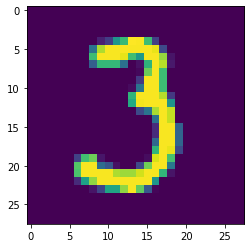

In [11]:
plt.imshow(X[6543,:].reshape(28,28))

We shuffle the data and we do the test-train splitting.

In [12]:
# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

We preproccess the data and use StandardScaler to have zero mean and unit variance. Pay attention that we do that only on the training set!

In [13]:
# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Exercise for the students** 
- You need to learn how to read a Python documentation. Search on the internet how to implement softmax regression with Sklearn.
- Fix the value of the regularization to be $10^{-5}$. Fit the data and compute two quantities: sparsity of the weights and score.

In [14]:
# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Example run in 28.449 s
Sparsity with L2 penalty: 9.31%
Test score with L2 penalty: 0.8944


Let us see how we can actually plot the weights against the pixels....beautiful!

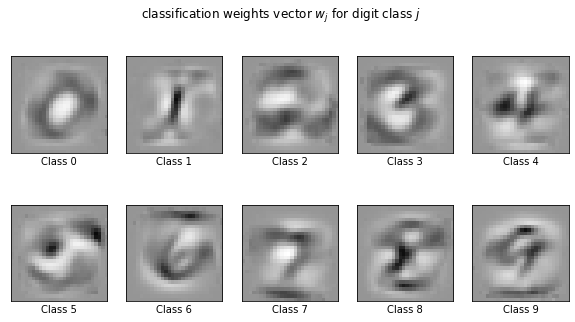

In [15]:
# plot weights vs the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

# 3) SVM Classification on real dataset 


**Exercise for the student**
- Repeat what you did for softmax regression for an SVM linear classifier.
- Go and search the Pythond doc for SVM classifier. Choose the linear one (we will see other in following lectures)
- Fit the data using the default value of regularization and compare with an optimized value using CV.

Clear and friendly reference can be found here: https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm. 

PS: If you do not know Kaggle, you should check it out!

In [16]:
from sklearn.svm import LinearSVC

In [17]:
# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.15,test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
model = LinearSVC(loss='hinge')

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [19]:
model.score(X_test,y_test)

0.8625714285714285

We can also fine-tune the parameter with cross-validation. 

In [20]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd


In [25]:

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'C': [10e-7,10e-6,10e-5,10e-4,10e-3,0.01,0.1,1,5,10,100]}]


# specify model
model = LinearSVC(loss="hinge")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, 

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='hinge', max_iter=1000, multi_class='ovr',
                                 penalty='l2', random_state=None, tol=0.0001,
                                 verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.01, 0.1, 1,
                                5, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [26]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.692880,0.009059,0.007630,0.000540,1e-06,{'C': 1e-06},0.726190,0.742381,0.746190,0.746190,0.744286,0.741048,0.007562,11,0.751905,0.742143,0.747143,0.743810,0.743690,0.745738,0.003488
1,0.811062,0.013366,0.007480,0.000347,1e-05,{'C': 1e-05},0.783810,0.810476,0.807619,0.802857,0.809524,0.802857,0.009879,10,0.816548,0.803095,0.802500,0.806310,0.803929,0.806476,0.005200
2,1.605424,0.082484,0.008790,0.000967,0.0001,{'C': 0.0001},0.782381,0.816190,0.812857,0.803810,0.802381,0.803524,0.011798,9,0.818333,0.805714,0.809167,0.811310,0.810357,0.810976,0.004137
3,4.639016,0.389373,0.008023,0.000758,0.001,{'C': 0.001},0.819048,0.841905,0.842857,0.834286,0.836190,0.834857,0.008552,6,0.863214,0.850595,0.856310,0.861071,0.853810,0.857000,0.004623
4,8.885022,0.293816,0.008263,0.000577,0.01,{'C': 0.01},0.873810,0.890952,0.886190,0.880476,0.893333,0.884952,0.007099,2,0.928929,0.925952,0.928571,0.925833,0.926071,0.927071,0.001377
5,8.896625,0.400707,0.008869,0.000917,0.01,{'C': 0.01},0.873810,0.891429,0.886190,0.880476,0.893333,0.885048,0.007181,1,0.928810,0.925952,0.928571,0.925833,0.926071,0.927048,0.001346
6,12.741445,0.204743,0.007862,0.000607,0.1,{'C': 0.1},0.869048,0.882381,0.880476,0.882857,0.880952,0.879143,0.005123,3,0.956786,0.955714,0.954881,0.956905,0.954762,0.955810,0.000908
7,19.949677,0.431174,0.007911,0.000857,1,{'C': 1},0.845238,0.858571,0.854762,0.854762,0.862381,0.855143,0.005702,4,0.971429,0.968214,0.970119,0.970476,0.967738,0.969595,0.001398
8,26.151050,0.761502,0.007681,0.000991,5,{'C': 5},0.836190,0.846667,0.840000,0.836190,0.842857,0.840381,0.004023,5,0.976429,0.971548,0.970833,0.972976,0.975595,0.973476,0.002198
9,26.386507,0.695323,0.007745,0.000828,10,{'C': 10},0.830000,0.842857,0.828095,0.830952,0.832857,0.832952,0.005185,8,0.968810,0.961071,0.961190,0.966071,0.970476,0.965524,0.003853


In [27]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.885047619047619 corresponding to hyperparameters {'C': 0.01}


In [24]:
model = LinearSVC(C=0.01, loss="hinge")

model.fit(X_train, y_train)
acc = model.score(X_test,y_test)

# metrics
print("accuracy", acc, "\n")


accuracy 0.8882857142857142 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
